In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants

In [2]:
Cm = 1.0  # membrane capacitance, in uF/cm^2
gK = 36.0  # maximum conductance of K+ channels, in mS/cm^2
gNa = 120.0  # maximum conductance of Na+ channels, in mS/cm^2
gL = 0.3  # maximum conductance of leak channels, in mS/cm^2
VK = -12.0  # K+ potential, in mV
VNa = 115.0  # Na+ potential, in mV
VL = 10.0  # leak channel potential, in mV
I_ext = 5.2  # external current, in uA/cm^2

# Time span

In [3]:
t_span = [0, 200]  # time span of the simulation, in milliseconds
t_eval = np.linspace(0, 200, 1000)  # time points at which to solve for V

def alpha_n(V):
    return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1)

def beta_n(V):
    return 0.125 * np.exp(-V / 80)

def alpha_m(V):
    return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1)

def beta_m(V):
    return 4.0 * np.exp(-V / 18)

def alpha_h(V):
    return 0.07 * np.exp(-V / 20)

def beta_h(V):
    return 1 / (np.exp((30 - V) / 10) + 1)

def hodgkin_huxley(t, y):
    V, n, m, h = y
    dVdt = (I_ext - gK * n**4 * (V - VK) - gNa * m**3 * h * (V - VNa) - gL * (V - VL)) / Cm
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    return [dVdt, dndt, dmdt, dhdt]


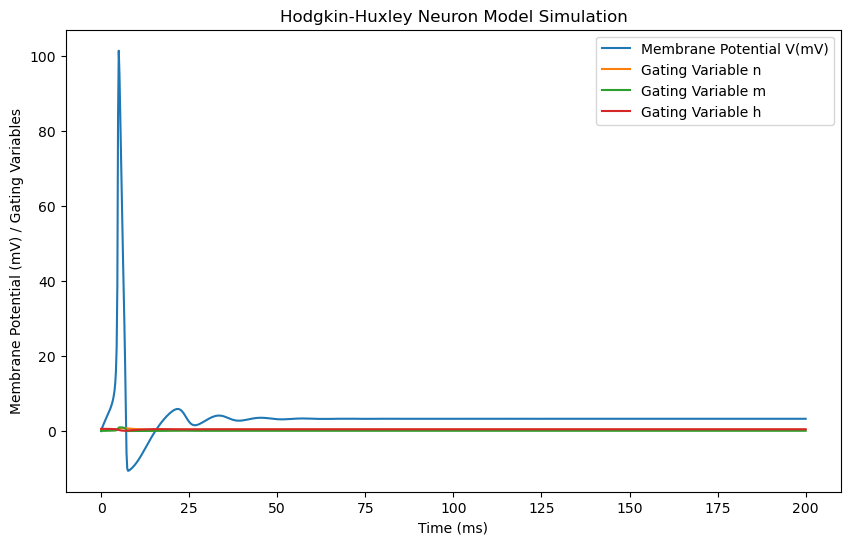

In [4]:
# Initial conditions
y0 = [0, 0.35, 0.06, 0.6]

# Solve the system
sol = solve_ivp(hodgkin_huxley, t_span, y0, t_eval=t_eval, method='RK45')

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Hodgkin-Huxley Neuron Model Simulation")
plt.plot(sol.t, sol.y[0], label='Membrane Potential V(mV)')
plt.plot(sol.t, sol.y[1], label='Gating Variable n')
plt.plot(sol.t, sol.y[2], label='Gating Variable m')
plt.plot(sol.t, sol.y[3], label='Gating Variable h')
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV) / Gating Variables")
plt.legend()
plt.show()


# Problems 2, 3, and 4

In [5]:
def run_simulation(I_ext, y0):
    sol = solve_ivp(hodgkin_huxley, t_span, y0, t_eval=t_eval, args=(I_ext,), method='RK45')
    plt.figure(figsize=(10, 8))
    plt.title(f"Hodgkin-Huxley Model: I_ext={I_ext} µA/cm², Initial V={y0[0]} mV")
    plt.plot(sol.t, sol.y[0], label='Membrane Potential V(mV)')
    plt.plot(sol.t, sol.y[1], label='Gating Variable n')
    plt.plot(sol.t, sol.y[2], label='Gating Variable m')
    plt.plot(sol.t, sol.y[3], label='Gating Variable h')
    plt.xlabel("Time (ms)")
    plt.ylabel("Values")
    plt.legend()
    plt.show()
    return sol

def hodgkin_huxley(t, y, I_ext):
    V, n, m, h = y
    dVdt = (I_ext - gK * n**4 * (V - VK) - gNa * m**3 * h * (V - VNa) - gL * (V - VL)) / Cm
    dndt = alpha_n(V) * (1 - n) - beta_n(V) * n
    dmdt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dhdt = alpha_h(V) * (1 - h) - beta_h(V) * h
    return [dVdt, dndt, dmdt, dhdt]

# Problem 2

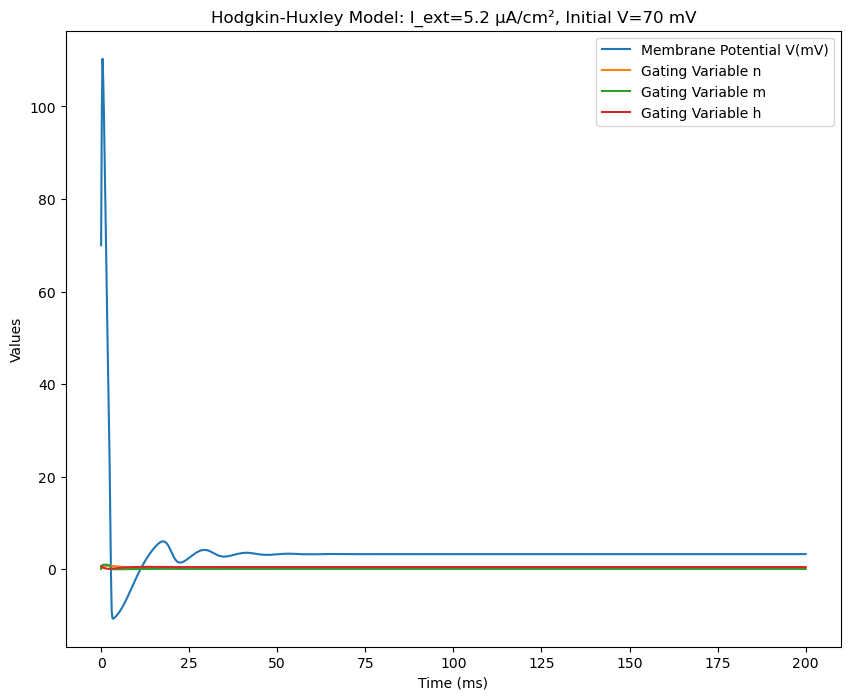

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.002e-01 ...  1.998e+02  2.000e+02]
        y: [[ 7.000e+01  9.941e+01 ...  3.275e+00  3.276e+00]
            [ 2.500e-01  3.435e-01 ...  3.689e-01  3.689e-01]
            [ 7.000e-02  6.800e-01 ...  7.735e-02  7.731e-02]
            [ 6.500e-01  5.333e-01 ...  4.790e-01  4.790e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1994
     njev: 0
      nlu: 0

In [6]:
y0_p2 = [70, 0.25, 0.07, 0.65]
I_ext_p2 = 5.2
run_simulation(I_ext_p2, y0_p2)

# Problem 3

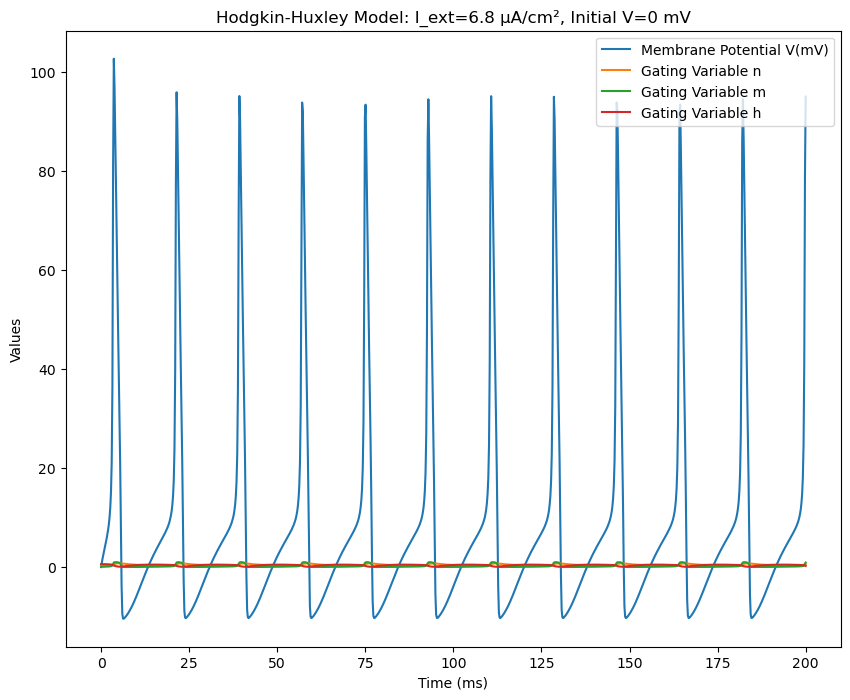

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.002e-01 ...  1.998e+02  2.000e+02]
        y: [[ 0.000e+00  9.210e-01 ...  7.905e+01  9.496e+01]
            [ 3.500e-01  3.491e-01 ...  5.018e-01  5.721e-01]
            [ 6.000e-02  5.797e-02 ...  7.017e-01  9.179e-01]
            [ 6.000e-01  5.995e-01 ...  2.795e-01  2.290e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 4082
     njev: 0
      nlu: 0

In [7]:
y0_p3 = [0, 0.35, 0.06, 0.6]
I_ext_p3 = 6.8
run_simulation(I_ext_p3, y0_p3)

# Problem 4

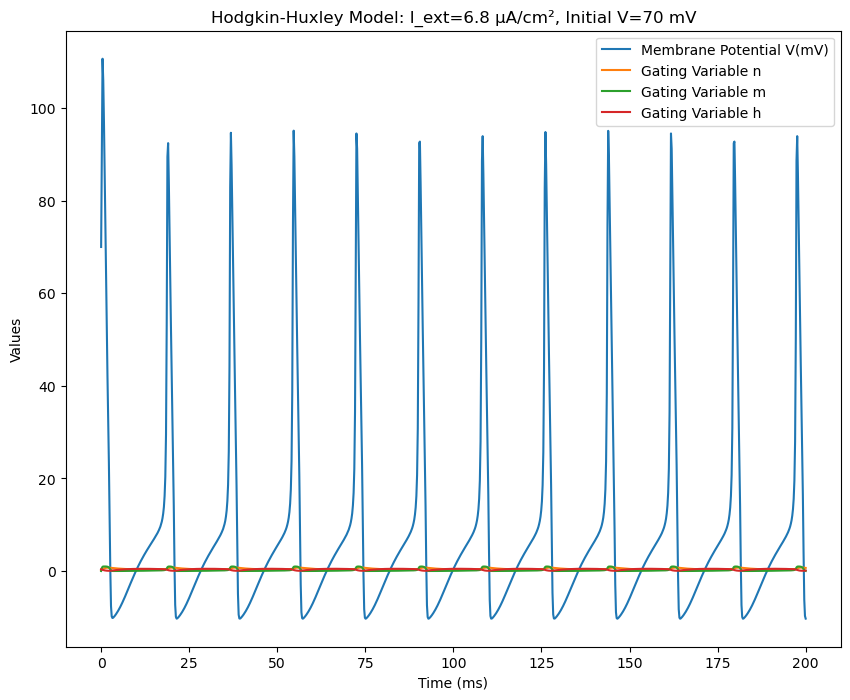

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.002e-01 ...  1.998e+02  2.000e+02]
        y: [[ 7.000e+01  8.922e+01 ... -9.696e+00 -1.027e+01]
            [ 1.500e-01  2.515e-01 ...  7.010e-01  6.832e-01]
            [ 2.000e-02  6.371e-01 ...  6.884e-02  2.803e-02]
            [ 4.000e-01  3.285e-01 ...  1.078e-01  1.279e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 4136
     njev: 0
      nlu: 0

In [8]:
y0_p4 = [70, 0.15, 0.02, 0.4]
I_ext_p4 = 6.8
run_simulation(I_ext_p4, y0_p4)
